# Matplotlib 各类图示
注: 本文内容来自于 https://matplotlib.org/gallery/index.html

## 折线图
### 折线图
- xy 生成折线图

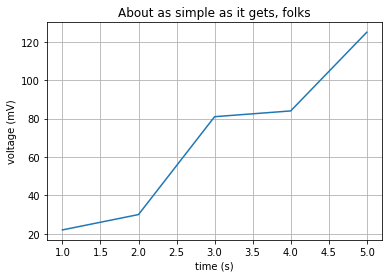

In [27]:
import matplotlib.pyplot as plt 
import numpy as np
import random
t=[1,2,3,4,5]
s = [i + i*random.randint(10,31) for i in t]
fig, ax = plt.subplots()
ax.plot(t, s)
ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()
plt.show()

### 弯曲的线段
- 数量更多的点看起来弯曲

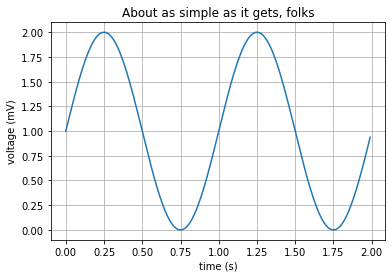

In [3]:
import matplotlib.pyplot as plt 
import numpy as np

t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)
ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()
plt.show()

### 虚线

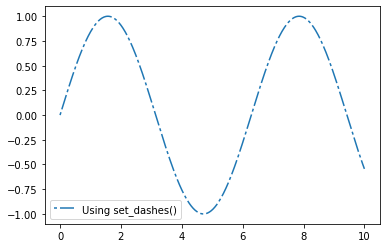

In [87]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 500)
y = np.sin(x)
fig, ax = plt.subplots()

# Using set_dashes() to modify dashing of an existing line
line1, = ax.plot(x, y, label='Using set_dashes()')
line1.set_dashes([2, 2, 10, 2])  # 2pt line, 2pt break, 10pt line, 2pt break
ax.legend()
plt.show()

### 覆盖线条

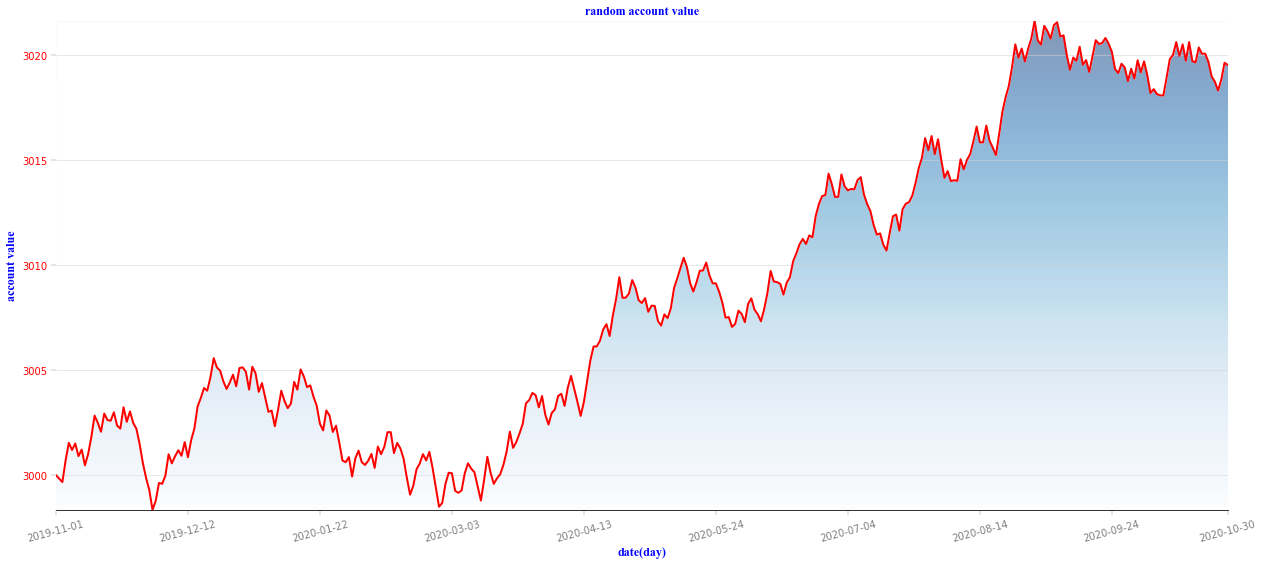

In [78]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime
import matplotlib.dates as mdate
import numpy as np
import random

DAYS = 365  

def initdata():
    timedelta = datetime.timedelta(days = 1)
    startdate = datetime.date.today()
    xdate = [startdate+i*timedelta for i in range(DAYS)]
    ycapital = [3000]
    for _ in range(DAYS-1):
        ycapital.append(ycapital[-1]+random.uniform(-1, 1.1))
        
    return xdate, ycapital

xdate, ydata = initdata()

xlims = mdate.date2num([xdate[0], xdate[-1]])
# 设置值，控制显示颜色深浅
# 第二个参数 yv 是每行值相同，逐行增加，所以设定了水平方向渐变
_, yv = np.meshgrid(np.linspace(0,1,210), np.linspace(0,1,90))

fig, ax = plt.subplots(figsize=(21,9))
ax.plot(xdate, ydata, 'r-', label = 'Test area line', linewidth=2)
# zv: array-like or PIL image, 
# origin:Place the [0,0] index of the array in the upper left or lower left corner of the axes
#ax.imshow(yv, cmap=mpl.cm.Blues)
extent = [xlims[0], xlims[1], min(ydata), max(ydata)]
ax.imshow(yv, cmap=mpl.cm.Blues, origin='lower',alpha = 0.5, aspect = 'auto',
          extent = extent)
ax.fill_between(xdate, ydata, max(ydata), color='white')

# 设置刻度值颜色
plt.yticks(color = 'red')
# 设置 y 轴百分比显示，注意将 y 轴数据乘以 100
#ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f%%'))
# 颜色，旋转刻度
plt.xticks(color = 'gray',rotation = 15)
# 指定字体，大小，颜色 
fontdict = {"family":"Times New Roman", 'size':12, 'color':'b'} #Times New Roman, Arial
plt.title("random account value", fontdict = fontdict)
plt.xlabel("date(day)", fontdict = fontdict)
plt.ylabel("account value", fontdict = fontdict)
# 去掉边框 top left right bottom
ax.spines['top'].set_visible(False) 
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
# 时间显示样式
ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))

#设置时间刻度间隔
timedelta = (xdate[-1] - xdate[0]) / 10  # 这种方式不能保证显示最后一个日期
plt.xticks(mdate.drange(xdate[0], xdate[-1], timedelta))
# 分成 10 份
delta = round(len(xdate) / 9)
plt.xticks([xdate[i*delta] for i in range(9)] + [xdate[-1]])

plt.tick_params(left = 'off')
# 设置刻度的朝向，宽，长度
plt.tick_params(which = 'major', direction = 'out', width = 0.2, length = 5) # in, out or inout
# 设置刻度显示在哪个方向上
#tick_params(labeltop='on',labelbottom='off',labelleft='off',labelright='off')
# 设置 y 轴方向的网络线
plt.grid(axis = 'y', color = 'lightgray', linestyle = '-', linewidth = 0.5)

plt.show()

## 柱状图

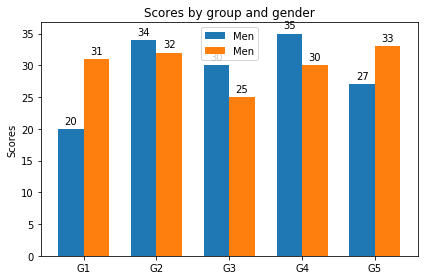

In [99]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np



labels = ['G1', 'G2', 'G3', 'G4', 'G5']
A = [20, 34, 30, 35, 27]
B = [31, 32, 25, 30, 33]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, A, width, label='Men')
rects2 = ax.bar(x + width/2, B, width, label='Men')



ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


## 饼图

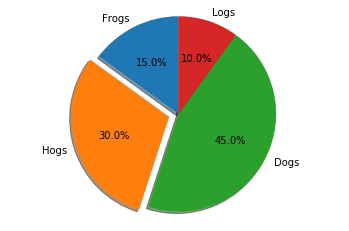

In [100]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## 散点图

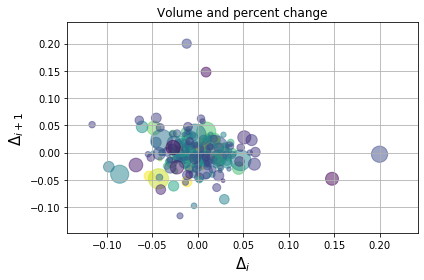

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
with cbook.get_sample_data('goog.npz') as datafile:
    price_data = np.load(datafile)['price_data'].view(np.recarray)
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()

## 子图

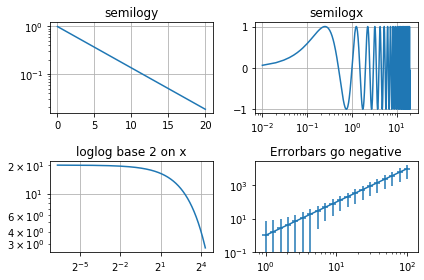

In [102]:
import numpy as np
import matplotlib.pyplot as plt

# Data for plotting
t = np.arange(0.01, 20.0, 0.01)

# Create figure
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

# log y axis
ax1.semilogy(t, np.exp(-t / 5.0))
ax1.set(title='semilogy')
ax1.grid()

# log x axis
ax2.semilogx(t, np.sin(2 * np.pi * t))
ax2.set(title='semilogx')
ax2.grid()

# log x and y axis
ax3.loglog(t, 20 * np.exp(-t / 10.0), basex=2)
ax3.set(title='loglog base 2 on x')
ax3.grid()

# With errorbars: clip non-positive values
# Use new data for plotting
x = 10.0**np.linspace(0.0, 2.0, 20)
y = x**2.0

ax4.set_xscale("log", nonposx='clip')
ax4.set_yscale("log", nonposy='clip')
ax4.set(title='Errorbars go negative')
ax4.errorbar(x, y, xerr=0.1 * x, yerr=5.0 + 0.75 * y)
# ylim must be set after errorbar to allow errorbar to autoscale limits
ax4.set_ylim(bottom=0.1)

fig.tight_layout()
plt.show()

## 文字

[(-3, 5), (-1, 5)]

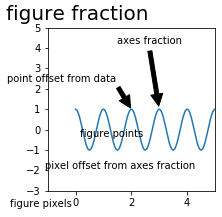

In [101]:
fig, ax = plt.subplots(figsize=(3, 3))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)

# Plot a line and add some simple annotations
line, = ax.plot(t, s)
ax.annotate('figure pixels',
            xy=(10, 10), xycoords='figure pixels')
ax.annotate('figure points',
            xy=(80, 80), xycoords='figure points')
ax.annotate('figure fraction',
            xy=(.025, .975), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=20)

# The following examples show off how these arrows are drawn.

ax.annotate('point offset from data',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')

ax.annotate('axes fraction',
            xy=(3, 1), xycoords='data',
            xytext=(0.8, 0.95), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

# You may also use negative points or pixels to specify from (right, top).
# E.g., (-10, 10) is 10 points to the left of the right side of the axes and 10
# points above the bottom

ax.annotate('pixel offset from axes fraction',
            xy=(1, 0), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')

ax.set(xlim=(-1, 5), ylim=(-3, 5))